# Lab 3: Exercise solutions

In [1]:
with open('../course/common.py') as fin:
    exec(fin.read())

In [2]:
with open('../course/matplotlibconf.py') as fin:
    exec(fin.read())

## Exercise 1

You just started working at a real estate investment firm, and they would like you to build a model for pricing houses. You receive a dataset that contains data for house prices and a few features like "number of bedrooms", "size in square feet" and "age of the house". Let's see if you can build a model that can predict the price. In this exercise, we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. load the dataset `../data/housing-data.csv`
- plot the histograms for each feature
- create two variables called `X` and `y`: `X` shall be a matrix with three columns (sqft, bdrms, age) and `y` shall be a vector with one column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with the training, check the $R^2$ on the test set

In [3]:
# Load the dataset ../data/housing-data.csv
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


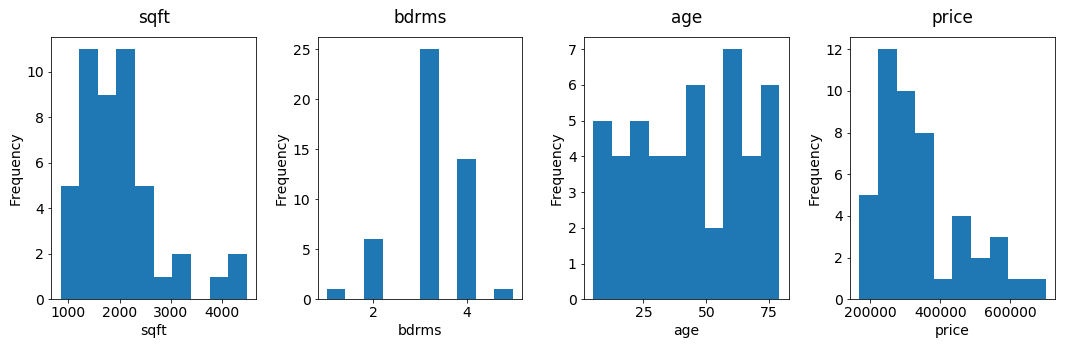

In [4]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

plt.tight_layout()

In [5]:
# create 2 variables called X and y:
# X shall be a matrix with 3 columns (sqft,bdrms,age)
# and y shall be a vector with 1 column (price)
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [7]:
# create a linear regression model in Keras
# with the appropriate number of inputs and output
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# split the data into train and test with a 20% test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2)

In [10]:
# train the model on the training set and check its
# accuracy on training and test set
# how's your model doing? Is the loss growing smaller?
model.fit(X_train, y_train, epochs=20, verbose=0);

In [11]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [12]:
# try to improve your model with these experiments:
#     - normalize the input features with one of the
#       rescaling techniques mentioned above
#     - use a different value for the learning rate of
#       your model
#     - use a different optimizer
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [13]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [14]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2)

In [15]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20, verbose=0);

In [16]:
from sklearn.metrics import r2_score

In [17]:
# once you're satisfied with training, check the
# R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r_ = r2_score(y_train, y_train_pred)
print("R2 score on Train set is:\t{:0.3f}".format(r_))

r_ = r2_score(y_test, y_test_pred)
print("R2 score on Test set is:\t{:0.3f}".format(r_))

R2 score on Train set is:	0.755
R2 score on Test set is:	0.364


## Exercise 2

Your boss was delighted with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen many people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees, and they would like you to build a model that can predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last five years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stays?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision, and recall
- check if you still get the same results if you use 5-Fold cross-validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, this logistic regression model is not good enough to help your boss. In the next lab, we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [18]:
# load the dataset at ../data/HR_comma_sep.csv, inspect
# it with `.head()`, `.info()` and `.describe()`.

df = pd.read_csv('../data/HR_comma_sep.csv')

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,...,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,...,1,0,sales,low
1,0.80,0.86,5,262,...,1,0,sales,medium
2,0.11,0.88,7,272,...,1,0,sales,medium
3,0.72,0.87,5,223,...,1,0,sales,low
4,0.37,0.52,2,159,...,1,0,sales,low


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [22]:
# Establish a benchmark: what would be your accuracy
# score if you predicted everyone stay?

df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

Predicting 0 all the time would yield an accuracy of 76%

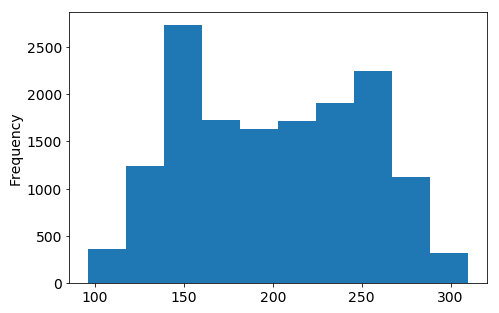

In [23]:
# Check if any feature needs rescaling.
# You may plot a histogram of the feature to decide
# which rescaling method is more appropriate.
df['average_montly_hours'].plot(kind='hist');

In [24]:
df['average_montly_hours_100'] = \
    df['average_montly_hours']/100.0

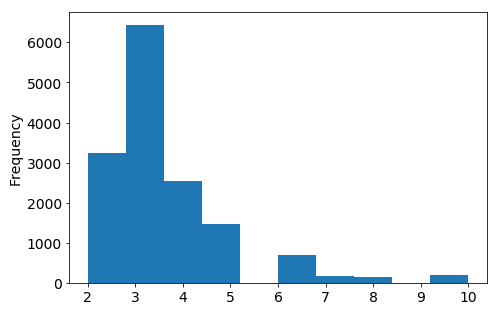

In [25]:
df['time_spend_company'].plot(kind='hist');

In [26]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [27]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [28]:
X = pd.concat([df[['satisfaction_level',
                   'last_evaluation',
                   'number_project',
                   'time_spend_company',
                   'Work_accident',
                   'promotion_last_5years',
                   'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [29]:
X.shape

(14999, 20)

In [30]:
# do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2)

In [31]:
# play around with learning rate and optimizer

model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5),
              'binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train);

11999/11999 [==============================] - 1s 79us/sample - loss: 0.5612 - accuracy: 0.7611


In [33]:
y_test_pred = model.predict_classes(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
def pretty_confusion_matrix(y_true, y_pred,
                            labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,
                      index=labels,
                      columns=pred_labels)
    return df

In [36]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred,
                        labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2227,66
Leave,616,91


In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      2293
           1       0.58      0.13      0.21       707

   micro avg       0.77      0.77      0.77      3000
   macro avg       0.68      0.55      0.54      3000
weighted avg       0.74      0.77      0.71      3000



In [38]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [39]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

def build_logistic_regr():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regr,
                        epochs=10, verbose=0)

In [40]:
from sklearn.model_selection import cross_val_score, KFold

In [41]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("Cross val accuracy is {:0.4f} ± {:0.4f}".format(
    scores.mean(), scores.std()))

Cross val accuracy is 0.7787 ± 0.0160


In [42]:
scores

array([0.78433335, 0.75700003, 0.77866668, 0.80466664, 0.76892298])

In [43]:
# Is the model good enough for your boss?

No, the model is not good enough for my boss, since it performs no better than the benchmark.